University of Michigan - ROB 101 Computational Linear Algebra

# Homework 7. Underdetermined Systems of Linear Equations, Bases, Dimension, Rank & Nullity, and Eigenstuff (15 points)
### Due: 11/04 at 9 PM Eastern

#### Purpose: Wrapping Up Linear Algebra 
- Skills
    - Solving a set of underdetermined linear equations
    - Eliminating dependent vectors to arrive at a basis
    - Tying together dimension, rank, and nullity
    - Understanding what does it mean to be an eigenvector of a square matrix
    - Understanding what you learn from the magnitude of the eigenvalue
- Knowledge
    - New built-in Julia functions: rank, eigen
    - How to explore ideas on your own
    
#### Task:
Complete and run the cells below as directed.

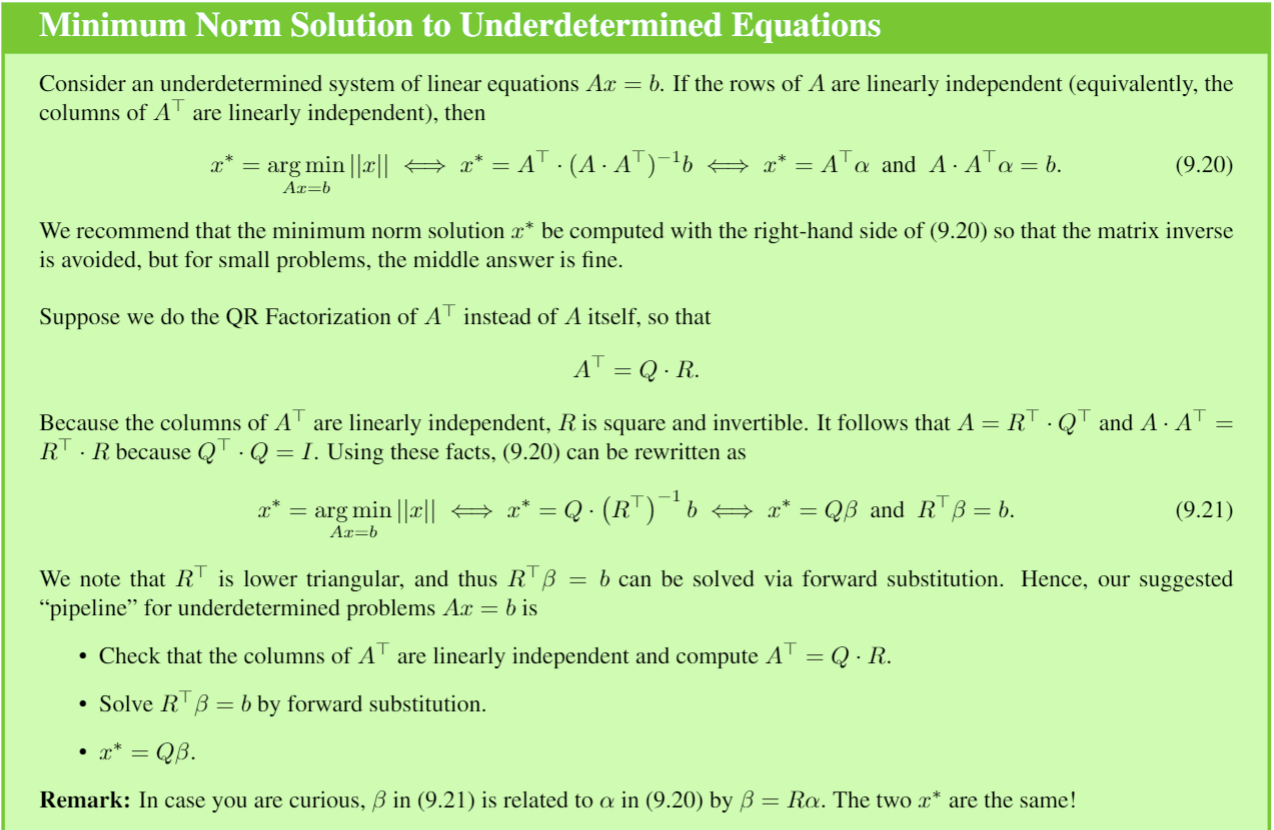

### Problem 1: using any method you want, compute a minimum norm solution to Ax=b (2 points)

In [ ]:
using Random
using LinearAlgebra
A=randn(3,100)
b=[1;1;1]
# Compute xStar
## your code here
# your code here
throw(ErrorException())

In [ ]:
# friendly test
T1=@assert(norm(A*xStar-b)<1e-8)
V = nullspace(A)
nRowsV,mColsV = size(V)
alpha = randn(mColsV,1)
xRandomNullV = V*alpha
T2=@assert(norm(xStar)< norm(xStar+xRandomNullV)) 
println("All nothings means likely correct!")
[T1 T2]

### Read this Section in the ROB 101 Textbook: (Optional Read): Steering a Mobile Robot as a Practical Example of an Underdetermined System of Linear Equations

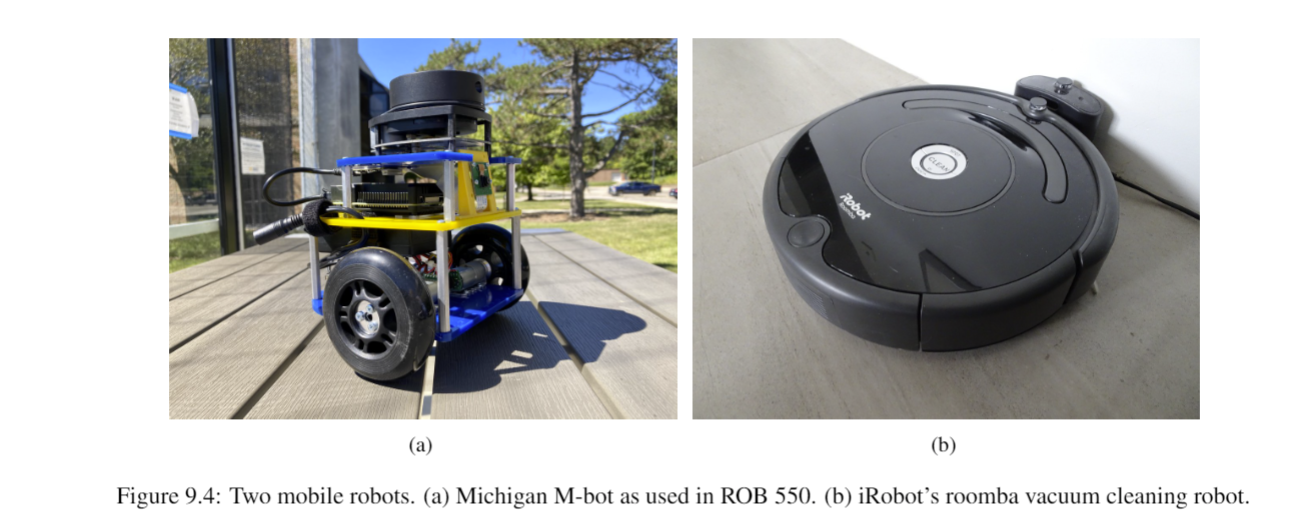

In [ ]:
# Run me, don't change me
# Model of our mobile robot
dt=0.1
@show B = zeros(2,2) + dt*I
@show A = I + dt*[0 -0.5; 0.5 0.0]

### Problem 2a: For the given initial position p0, and input sequence u0, u1, u2, compute p1, p2, and p3 (2 points)

Note that $p_{k+1} = A*p_{k} + B*u_{k}$

In [ ]:
p0 = [0;0]
u0 = [-1;1]
u1 = [2;3]
u2 = [-pi;pi]
# Uncomment and compute p1, p2, and p3
# p1 =
# p2 = 
# p3 =
# your code here
throw(ErrorException())

In [ ]:
# friendly test
T1=@assert(norm(p3-[-0.23890926535897933; 0.7139092653589794])<1e-8)
#
println("All nothings means likely correct!")
[T1]

In [ ]:
#autograder cell

### Problem 2b: Find an input sequence u0, u1, u2, of minimum norm that drives the robot from p0 to p3 (2 points)

**In Project 3**, we will use this idea to stabilize a Segway!

In [ ]:
# do not change p0 and p3
# use the model from Problem 2a
p0 = [0;0]
p3 = [-0.23890926535897933; 0.7139092653589794]
#
# Do any necessary computations and then report your answer as 
# u0=
# u1=
# u2=
# If you do not read the Section "Steering a Mobile Robot as a Practical Example of an 
# Underdetermined System of Linear Equations", then you will not get very far.
# Not so optional read anymore :) 
# your code here
throw(ErrorException())

In [ ]:
# friendly test
p1=A*p0+B*u0
p2=A*p1+B*u1
p3=A*p2+B*u2
T1=@assert(norm(p2-[-0.13530666434601368; 0.483298777542166])<1e-8)
T2=@assert(norm(p3-[-0.23890926535897933; 0.7139092653589794])<1e-8)
#
println("All nothings means likely correct!")
[T1 T2]

In [ ]:
#autograder cell

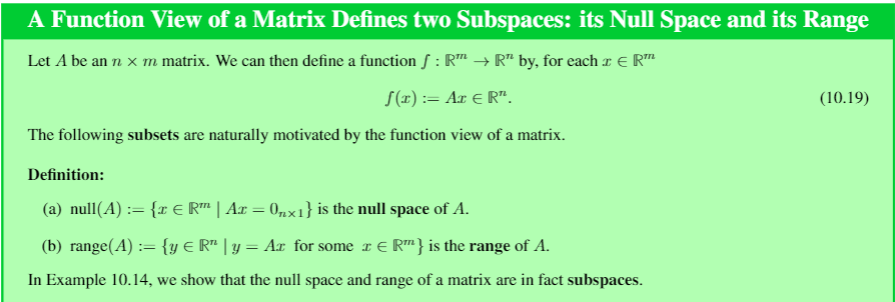

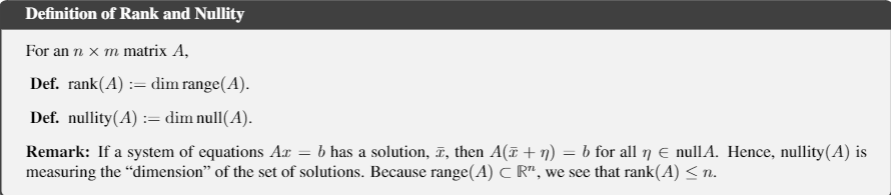

#### Julia has a command to compute the rank of a matrix. 

In [ ]:
# Run me, don't change me
using LinearAlgebra
using Random
Random.seed!(2021)
A=randn(20,11)
rank(A)

#### but it does not have one to compute the nullity of a matrix. 

### Problem 3: Build a function called nullity that will compute nullity(A) for an  n x m matrix A (1 point)

In [ ]:
# Complete the code as required so that your function returns the 
# dimension of the null space of A
function nullity(A)
    # your code here
    throw(ErrorException())
end

In [ ]:
# friendly test
A1=[1 2 3; 4 5 7; 5 7 10]
T1=@assert(nullity(A1)==1)
A2=randn(17,100)
# Next test is based on the rank nullity theorem and facts about
# random matrices...oooohhhh aaahhhhh. 
T2=@assert(nullity(A2)==(size(A2,2)-size(A2,1))) 
println("All nothings means likely correct!")
[T1 T2]

In [ ]:
#autograder test

### Problem 4: Build a function called colSpanBasis(A) that produces an orthonornal set of vectors  whose span equals the colSpan(A). Return the orthonormal vectors in a matrix. (2 Points)

Hint: you may find useful code in LAB7. You can also write the code from scratch

In [ ]:
function colSpanBasis(A) 
 # Your code here 
    # your code here
    throw(ErrorException())
end

In [ ]:
# Friendly self test
using Random
Random.seed!(1999)
Abig = rand(5,27)
V=colSpanBasis(Abig) 
T1=@assert rank(Abig)==rank(V)
T2=@assert rank([V Abig])==rank(Abig)
[T1 T2]

In [ ]:
#autograder cell

### Exercise 6a: How to compute eigenvalues and eigenvectors of a square matrix in Julia

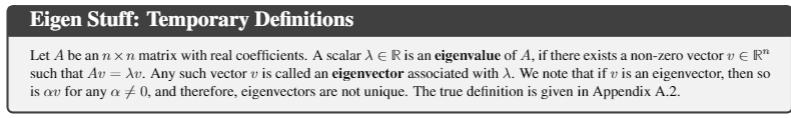

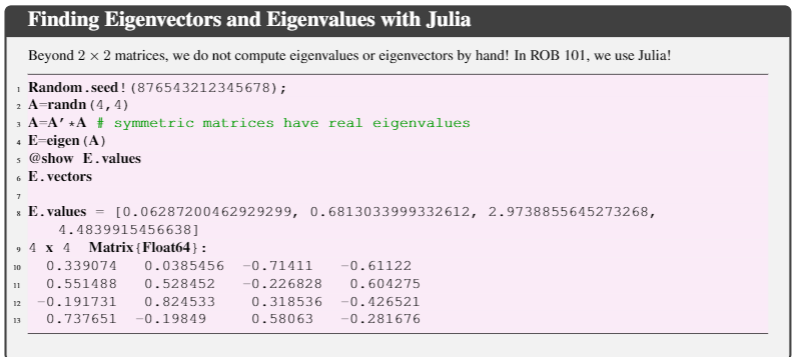

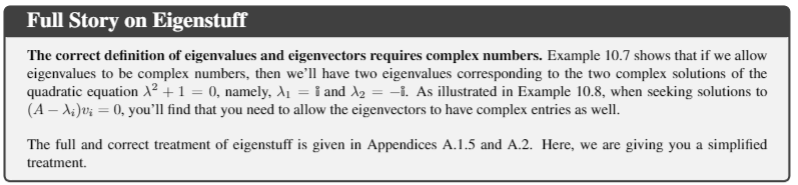

There are two complex eigenvalues...

In [ ]:
# run me, don't change me
Random.seed!(2921)
A=randn(3,3)
E=eigen(A)
E.values

...and hence, there are two complex eigenvectors

In [ ]:
# run me, don't change me
E.vectors

Even for complex eigenvectors, it is still true that Av = lambda\*v

In [ ]:
# run me, don't change me
v=E.vectors[:,2]
lambda=E.values[2]
norm(A*v - lambda*v)

### Exercise 6b: The relative frequency that something occurs is called its probability. Let's estimate the `probability` that a 3 x 3 matrix has at least one complex eigenvalue

In [ ]:
# Run me, don't change me
function findProbComplex(N)
    Random.seed!(2021)
    j=0
    A=zeros(3,3)
    for k = 1:N
        A=randn(3,3)
        F=eigen(A)
        imagV=imag(F.vectors)
        if norm(imagV) > 1e-8
            j=j+1
        end
    end
    return j/N, j, N
end

@show (prob, j, N) = findProbComplex(1e5)  
println("The probability is quite high! Over 60% of the time, we need to allow for complex eigenvalues and eigenvectors")
println("These are treated in the appendix of our textbook")

### Exercize 6c: Symmetric matrices always have real eigenvalues and eigenvectors. Moreover, the eigenvectors form an orthogonal set!

In [ ]:
# Run me, don't change me
function findProbComplexWhenAisSymmetric(N)
    Random.seed!(2021)
    j=0
    A=zeros(3,3)
    for k = 1:N
        A=randn(3,3)
        A=A+A' # this makes A symmetric!
        F=eigen(A)
        imagV=imag(F.vectors)
        if norm(imagV) > 1e-8
            j=j+1
        end
    end
    return j/N, j, N
end

@show (prob, j, N) = findProbComplexWhenAisSymmetric(1e5) 
println("The probability of a symmetric matrix having complex eigenvalues and eigenvectors is $prob")

In [ ]:
# Run me, don't change me
A=randn(5,5)
A=A+A'  # make it symmetric
F=eigen(A)
@show eValues=F.values
eVectors=F.vectors

In [ ]:
# Run me, don't change me
Temp=eVectors'eVectors
function cleanUp(A,tol=1e-10)
    # Zero out small entries of a matrix or vector
    B=copy(A)
    indicesSmall=findall(x->x<tol, abs.(B))
    B[indicesSmall]=0.0*abs.(B[indicesSmall])
return B
end
cleanUp(Temp)

#### Wow, the eigenvectors of a symmetric matrix can be constructed to be orthonormal, and that is what Julia does! Who would have guessed that?!?!?!?

#### *Exercise 6 has nothing to turn in!*

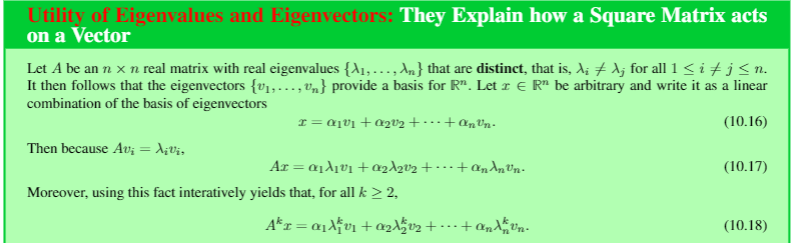

### Problem 7: Understanding what the magnitude of an eigenvalue means. (1+1+1 points)

In [ ]:
# run me, don't change me
Random.seed!(2021)
V=randn(4,4)
D=Diagonal([-2; -.5; .75; 4]) # 
A=inv(V)*D*V # using some eigenvalue eigenvector magic here

Julia, MATLAB and most programs normalize the eigenvectors to have length one.

In [ ]:
# run me, don't change me
E=eigen(A)
for k = 1:size(E.vectors,2)
@show norm(E.vectors[:,k])
end
E

In [ ]:
# Your work starts here
# Give a vector v1 that is non zero and ||A*v2|| > ||v2||

v1 = 
# your code here
throw(ErrorException())


In [ ]:
# autograder cell

In [ ]:
# Give a vector v2 that is non zero and ||A*v2|| < 0.6* ||v2||

v2 = 

# your code here
throw(ErrorException())

In [ ]:
# autograder cell

In [ ]:
# Give a vector v3 that is non zero, is NOT an eigenvector, and ||A^2 v|| > 4 *||v|| 
# v = 4th col also check that not eigenvector
v3 = 
# your code here
throw(ErrorException())

In [ ]:
using LinearAlgebra
# autograder cell

### Problem 8: Rank and Nullity (1+2)

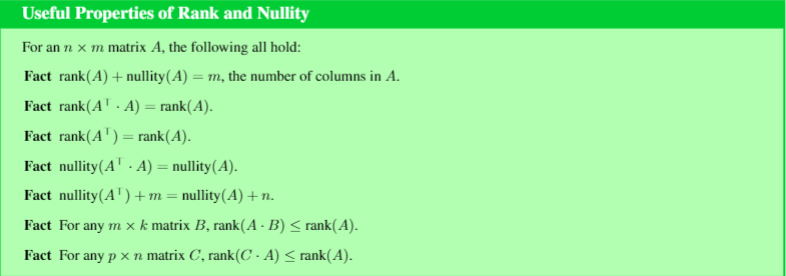

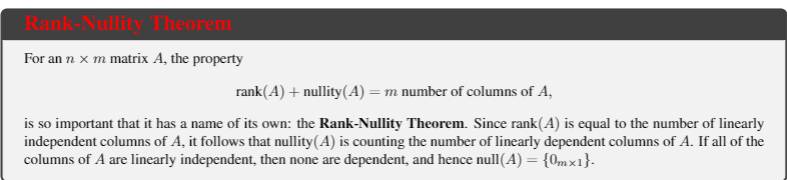

We're going to take a random matrix A and explcitily verify that rank(A) + nullity(A) = number of columns of A

In [ ]:
# Run me, don't change me
Random.seed!(1957)
A=randn(4,7)

YOUR ANSWER HERE

### Problem 8b. Basis Vectors (2 Points)

In [ ]:
# Run me, don't change me
A1=A[:,1:4]
A2=A[:,5:end]
#
b1=A2[:,1]
b2=A2[:,2]
b3=A2[:,3]

In [ ]:
# Give vectors v1, v2, v3 such that, A v_i = b_i for i = 1, 2, 3
v1 = 
v2 = 
v3 = 
# your code here
throw(ErrorException())

In [ ]:
# verify that v1 v2 v3 are linearly independent
# there is nothing to turn in here

# your code here
throw(ErrorException())

In [ ]:
# Use {v1, v2, v3} to construct a basis {u1, u2, u3} for the null space of A 
# Hint: we give you u2
u2=[v2;0;-1;0]
@show cleanUp(A*u2)

# Uncomment and provide values for u1 and u3
# u1 = 
# u3 = 
# your code here
throw(ErrorException())

This works because $A *u2 = A1*v2-b2 = 0_{4 x 1}$, which is true because $A1*v2=b2 ==> A1*v2-b2 = 0$. You can extend the reasoning to the other cases. You have 4 linearly indep columns of A, and thus its rank is 4. You have constructed 3 linearly indep vectors in the nullspace of A, and hence its nullity is 3. Hence, 4 + 3 = 7

In [ ]:
# autograder cell